# Import libraries :open_file_folder:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

import warnings
import joblib

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgbm

# Ignore WARNINGS :warning:

In [2]:
warnings.filterwarnings('ignore')

# Read CSV file :scroll:

In [5]:
df = pd.read_csv("../../src/alpha1.csv")
df

,id,address,price,floor,total_floors,rooms,square,city,remont,balcon,uid,view,year,type_perec,hot_water,fundament,kitchen,total_floor,Unnamed: 0
0,0.0,"улица Туполева, 15",3100000,9,9.0,1,36.4,Воронеж,standard,1,2059802857,garden,1986.0,Железобетонный,0.0,0.0,"8,5 м2",NaN,NaN
1,1.0,"улица Фёдора Тютчева, 99",3270000,4,9.0,1,30.0,Воронеж,standard,1,2059678399,garden,2011.0,Железобетонный,0.0,0.0,0,NaN,NaN
2,2.0,"улица Фёдора Тютчева, 95Е",3350000,1,9.0,1,32.4,Воронеж,standard,1,2057432696,garden,2013.0,Железобетонный,0.0,0.0,9 м2,NaN,NaN
3,3.0,"переулок Парашютистов, 6",2800000,5,5.0,1,30.4,Воронеж,standard,1,2059084407,garden,1970.0,Железобетонный,0.0,0.0,6 м2,NaN,NaN
4,4.0,"улица Чебышева, 16",2100000,2,5.0,1,30.2,Воронеж,standard,1,2059631819,garden,1976.0,0,0.0,0.0,6 м2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70661,NaN,"3-й Крутицкий переулок, 11",53000000,8,NaN,4,116.7,Москва,design,2,2059807526,street,2003.0,Железобетонный,0,0,14 м2,19.0,11160.0
70662,NaN,"Мичуринский проспект, 11к1",54800000,6,NaN,4,132.0,Москва,design,2,2058216516,street,2001.0,Железобетонный,0,0,"12,8 м2",17.0,11161.0
70663,NaN,"улица Дзержинского, 6",18600000,4,NaN,4,132.0,Москва,well_done,2,1523532836,street,2010.0,Железобетонный,0,0,"20,4 м2",16.0,11162.0
70664,NaN,"Профсоюзная улица, 104",46500000,14,NaN,4,137.2,Москва,well_done,2,2058030172,street,2006.0,Железобетонный,0,0,"18,2 м2",17.0,11163.0


# Drop unnecessary columns :x:

In [6]:
df = df.drop(["id", "total_floor", "uid", "address", 'Unnamed: 0', 'total_floors'], axis=1)
df


,price,floor,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament,kitchen
0,3100000,9,1,36.4,Воронеж,standard,1,garden,1986.0,Железобетонный,0.0,0.0,"8,5 м2"
1,3270000,4,1,30.0,Воронеж,standard,1,garden,2011.0,Железобетонный,0.0,0.0,0
2,3350000,1,1,32.4,Воронеж,standard,1,garden,2013.0,Железобетонный,0.0,0.0,9 м2
3,2800000,5,1,30.4,Воронеж,standard,1,garden,1970.0,Железобетонный,0.0,0.0,6 м2
4,2100000,2,1,30.2,Воронеж,standard,1,garden,1976.0,0,0.0,0.0,6 м2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70661,53000000,8,4,116.7,Москва,design,2,street,2003.0,Железобетонный,0,0,14 м2
70662,54800000,6,4,132.0,Москва,design,2,street,2001.0,Железобетонный,0,0,"12,8 м2"
70663,18600000,4,4,132.0,Москва,well_done,2,street,2010.0,Железобетонный,0,0,"20,4 м2"
70664,46500000,14,4,137.2,Москва,well_done,2,street,2006.0,Железобетонный,0,0,"18,2 м2"


# Fix kitchen values :wrench:

In [7]:
i = 0
for value in df['kitchen']:
    try:
        temp_list = value.split("\xa0")
        value = temp_list[0]
        value = value.replace(",", ".")
    except:
        pass
    value = float(value)
    df['kitchen'][i] = value
    i += 1
    print(i, "/", len(df['kitchen']), " " , ceil((i * 100) / len(df['kitchen'])), "%" , end='\r')

In [8]:
df

,price,floor,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament,kitchen
0,3100000,9,1,36.4,Воронеж,standard,1,garden,1986.0,Железобетонный,0.0,0.0,8.5
1,3270000,4,1,30.0,Воронеж,standard,1,garden,2011.0,Железобетонный,0.0,0.0,0.0
2,3350000,1,1,32.4,Воронеж,standard,1,garden,2013.0,Железобетонный,0.0,0.0,9.0
3,2800000,5,1,30.4,Воронеж,standard,1,garden,1970.0,Железобетонный,0.0,0.0,6.0
4,2100000,2,1,30.2,Воронеж,standard,1,garden,1976.0,0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70661,53000000,8,4,116.7,Москва,design,2,street,2003.0,Железобетонный,0,0,14.0
70662,54800000,6,4,132.0,Москва,design,2,street,2001.0,Железобетонный,0,0,12.8
70663,18600000,4,4,132.0,Москва,well_done,2,street,2010.0,Железобетонный,0,0,20.4
70664,46500000,14,4,137.2,Москва,well_done,2,street,2006.0,Железобетонный,0,0,18.2


# Exploratory Data Analysis (EDA) :gem: :mag:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70666 entries, 0 to 70665
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       70666 non-null  int64  
 1   floor       70666 non-null  int64  
 2   rooms       70666 non-null  int64  
 3   square      70666 non-null  float64
 4   city        70666 non-null  object 
 5   remont      70666 non-null  object 
 6   balcon      70666 non-null  int64  
 7   view        70666 non-null  object 
 8   year        62790 non-null  float64
 9   type_perec  62790 non-null  object 
 10  hot_water   62790 non-null  object 
 11  fundament   62790 non-null  object 
 12  kitchen     62790 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 7.0+ MB


In [13]:
df.isna().sum()

price         0
floor         0
rooms         0
square        0
city          0
remont        0
balcon        0
view          0
year          0
type_perec    0
hot_water     0
fundament     0
kitchen       0
dtype: int64

In [12]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62790 entries, 0 to 70665
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       62790 non-null  int64  
 1   floor       62790 non-null  int64  
 2   rooms       62790 non-null  int64  
 3   square      62790 non-null  float64
 4   city        62790 non-null  object 
 5   remont      62790 non-null  object 
 6   balcon      62790 non-null  int64  
 7   view        62790 non-null  object 
 8   year        62790 non-null  float64
 9   type_perec  62790 non-null  object 
 10  hot_water   62790 non-null  object 
 11  fundament   62790 non-null  object 
 12  kitchen     62790 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 6.7+ MB


In [14]:
df.describe()

,price,floor,rooms,square,balcon,year
count,6.279000e+04,62790.000000,62790.000000,62790.000000,62790.000000,62790.000000
mean,1.382672e+07,7.414047,1.911116,58.023864,1.156171,1930.982720
std,2.171252e+07,5.182272,1.032040,29.988552,0.363021,367.292531
min,6.300000e+05,1.000000,0.000000,10.800000,1.000000,0.000000
25%,5.450000e+06,3.000000,1.000000,38.800000,1.000000,1979.000000
50%,8.750000e+06,6.000000,2.000000,52.400000,1.000000,2009.000000
75%,1.520000e+07,10.000000,3.000000,68.200000,1.000000,2018.000000
max,7.248046e+08,43.000000,4.000000,586.000000,2.000000,2230.000000


In [16]:
df.duplicated().sum()
df = df.drop_duplicates()

In [17]:
df

,price,floor,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament,kitchen
0,3100000,9,1,36.4,Воронеж,standard,1,garden,1986.0,Железобетонный,0.0,0.0,8.5
1,3270000,4,1,30.0,Воронеж,standard,1,garden,2011.0,Железобетонный,0.0,0.0,0.0
2,3350000,1,1,32.4,Воронеж,standard,1,garden,2013.0,Железобетонный,0.0,0.0,9.0
3,2800000,5,1,30.4,Воронеж,standard,1,garden,1970.0,Железобетонный,0.0,0.0,6.0
4,2100000,2,1,30.2,Воронеж,standard,1,garden,1976.0,0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70648,44000000,8,4,155.0,Москва,design,1,street,2011.0,Железобетонный,0,0,40.0
70649,17900000,2,4,120.0,Москва,well_done,1,street,2022.0,0,0,0,16.0
70657,35000000,14,4,133.6,Москва,design,2,street,2014.0,Железобетонный,Центральное,0,19.1
70662,54800000,6,4,132.0,Москва,design,2,street,2001.0,Железобетонный,0,0,12.8


In [18]:
# df['total_floors'].mean() <~~ temporary deleted

In [19]:
# df = df.dropna() <-- suboptimal
# df.isna().sum()
for column in ["year"]: # <~~ insert 'total_floors'
    df[column] = df[column].fillna(df[column].mean())

In [20]:
for column in ['type_perec', 'hot_water', 'fundament', 'kitchen']:
    df[column] = df[column].fillna("0")


In [21]:
df

,price,floor,rooms,square,city,remont,balcon,view,year,type_perec,hot_water,fundament,kitchen
0,3100000,9,1,36.4,Воронеж,standard,1,garden,1986.0,Железобетонный,0.0,0.0,8.5
1,3270000,4,1,30.0,Воронеж,standard,1,garden,2011.0,Железобетонный,0.0,0.0,0.0
2,3350000,1,1,32.4,Воронеж,standard,1,garden,2013.0,Железобетонный,0.0,0.0,9.0
3,2800000,5,1,30.4,Воронеж,standard,1,garden,1970.0,Железобетонный,0.0,0.0,6.0
4,2100000,2,1,30.2,Воронеж,standard,1,garden,1976.0,0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70648,44000000,8,4,155.0,Москва,design,1,street,2011.0,Железобетонный,0,0,40.0
70649,17900000,2,4,120.0,Москва,well_done,1,street,2022.0,0,0,0,16.0
70657,35000000,14,4,133.6,Москва,design,2,street,2014.0,Железобетонный,Центральное,0,19.1
70662,54800000,6,4,132.0,Москва,design,2,street,2001.0,Железобетонный,0,0,12.8


In [22]:
df.nunique()

price         3545
floor           41
rooms            5
square        2249
city            92
remont           5
balcon           2
view             5
year           158
type_perec       9
hot_water       12
fundament       12
kitchen        431
dtype: int64

In [23]:
df['city'].unique()

array(['Воронеж', 'Оренбург', 'Орёл', 'Владивосток', 'Омск', 'Волгоград',
       'Уфа', 'Тверь', 'Калининград', 'Тольятти', 'Пермь', 'Краснодар',
       'Сочи', 'Долгопрудный', 'Домодедово', 'Иваново', 'Курск', 'Липецк',
       'Магнитогорск', 'Курган', 'коттеджный посёлок Лазурный Берег',
       'садоводческое некоммерческое товарищество Агро', 'СТ Прохлада',
       'СНТ Заря-2', 'садоводческое товарищество Лысая Гора',
       'СТ Швейник', 'коттеджный посёлок Домодедово Таун',
       'СНТ Здоровье-4', 'ЖСК Ветеран-Нагорный',
       'коттеджный посёлок Приуральский', 'Самара', 'Санкт-Петербург',
       'посёлок Шушары', 'Павловск', 'Пушкин', 'Ломоносов',
       'посёлок Парголово', 'Кронштадт', 'Колпино', 'Красное Село',
       'посёлок Металлострой', 'Сестрорецк', 'посёлок Репино', 'Петергоф',
       'посёлок Стрельна', 'посёлок Молодёжное', 'посёлок Песочный',
       'посёлок Лисий Нос', 'Зеленогорск', 'Парголово',
       'посёлок Сапёрный', 'посёлок Понтонный', 'Шушары', 'Казань',


# Visualization (graphics)

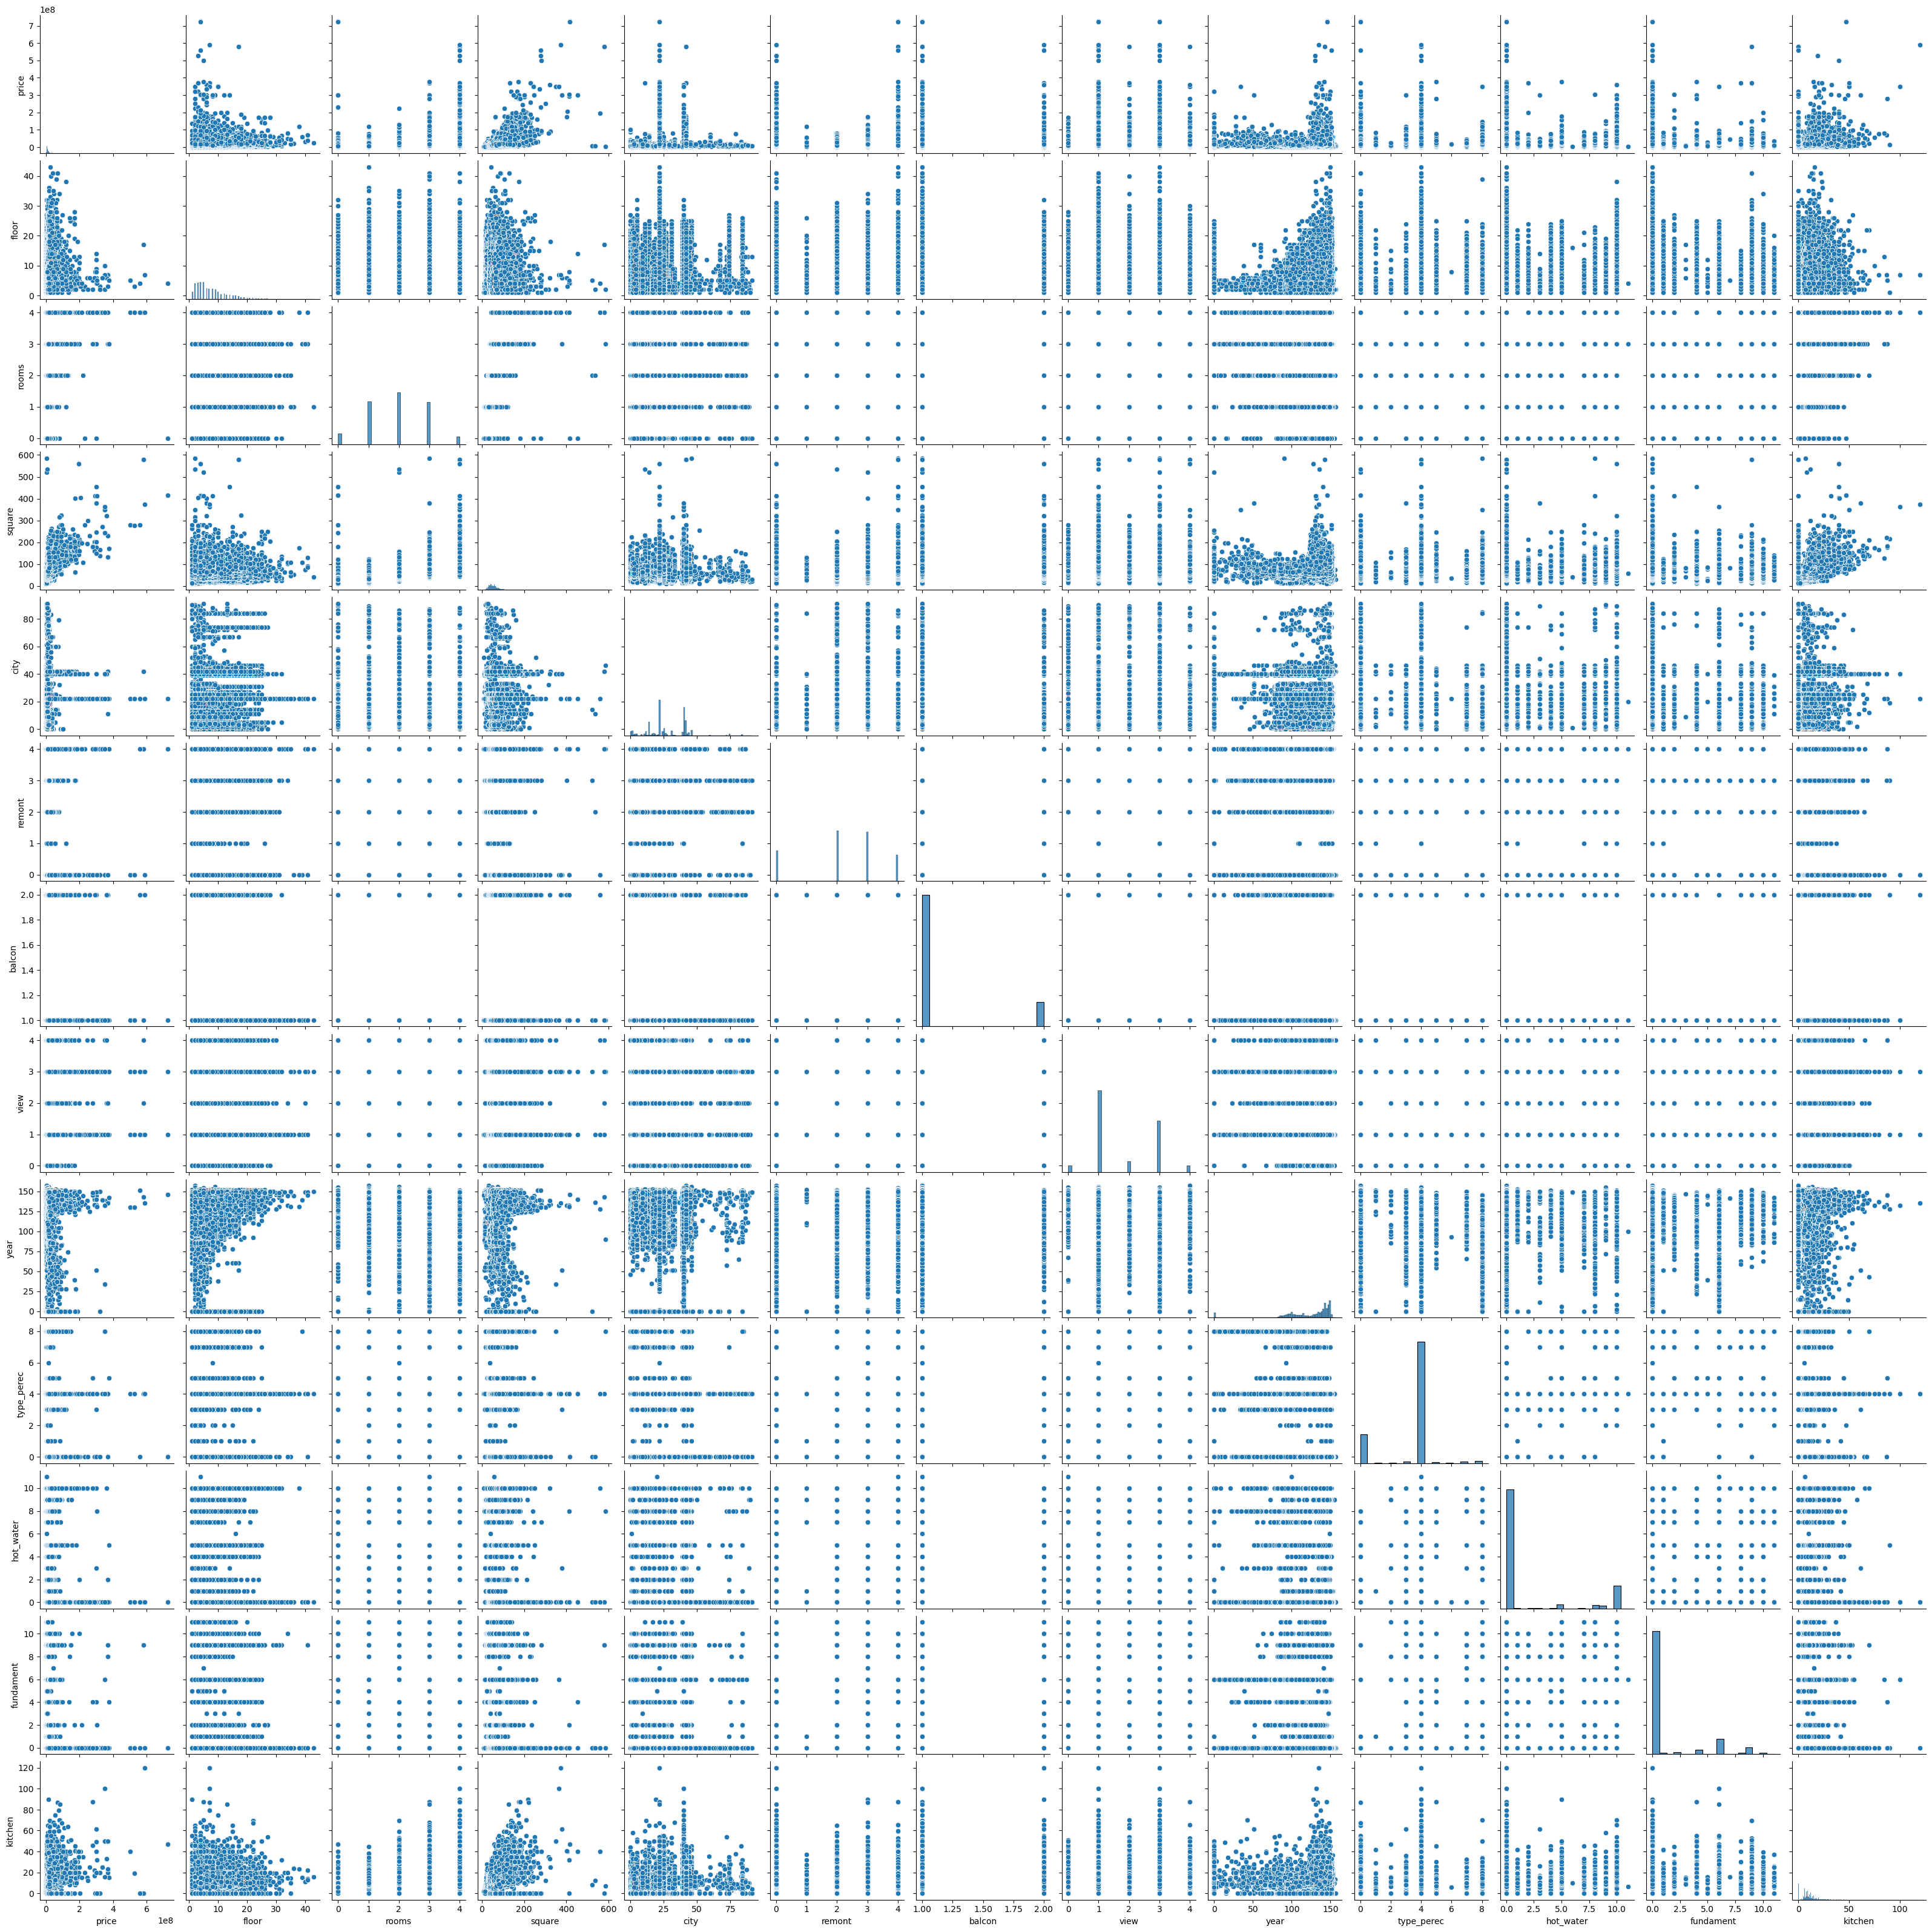

In [40]:
sns.pairplot(df)

In [24]:
count_rooms = df['rooms'].value_counts()
count_rooms

rooms
2    16646
1    13784
3    13558
0     3581
4     2506
Name: count, dtype: int64

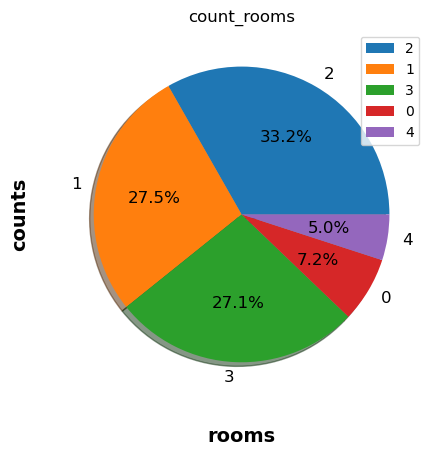

In [25]:
plt.figure()
explode = (0,0.09)
count_rooms.plot(kind = 'pie', fontsize = 12, autopct = '%.1f%%',shadow = True)
plt.title('count_rooms')
plt.xlabel('rooms', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_rooms.index, loc = "best")
plt.show()

In [26]:
count_view = df['view'].value_counts()
count_view

view
garden    26061
street    16446
park       3370
forest     2152
water      2046
Name: count, dtype: int64

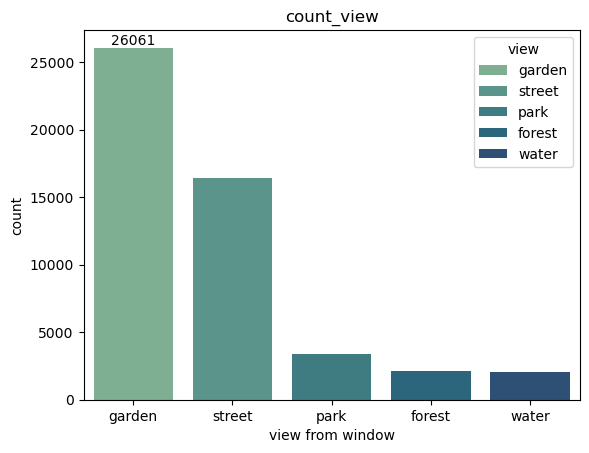

In [27]:
plt.figure()
ax = sns.barplot(x=count_view.index, y=count_view.values, palette='crest', legend=True, hue=count_view.index)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('count_view')
plt.xlabel('view from window')
plt.ylabel('count')
plt.show()

In [29]:
count_city = df['city'].value_counts()
count_city

city
Москва                  11464
Санкт-Петербург          9128
Сочи                     4618
Краснодар                4443
Омск                     2252
                        ...  
посёлок Птичное             1
Шушары                      1
ЖСК Ветеран-Нагорный        1
СНТ Заря-2                  1
посёлок Газопровод          1
Name: count, Length: 92, dtype: int64

In [30]:
count_fundament = df['fundament'].value_counts()
count_fundament

fundament
0                  39483
Ленточный           4968
Свайный             2256
Иной                1421
Бетонные столбы      698
0.0                  407
Сборный              388
Сплошной             372
Столбчатый            59
Комбинированный       15
Железобетон            6
Монолитный             2
Name: count, dtype: int64

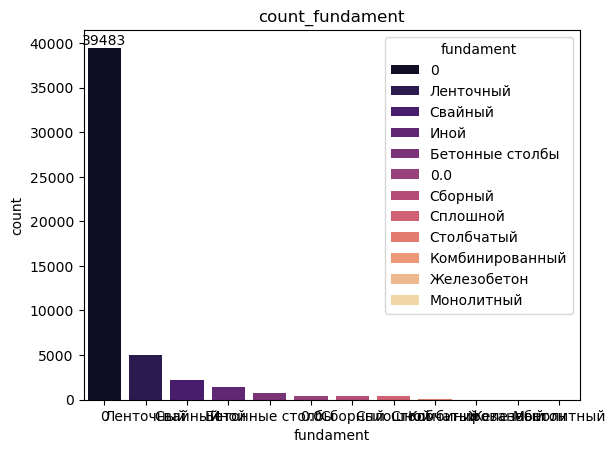

In [31]:
plt.figure()
ax = sns.barplot(x = count_fundament.index, y = count_fundament.values, palette='magma', legend=True, hue=count_fundament.index)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('count_fundament')
plt.xlabel('fundament')
plt.ylabel('count')
plt.show()

In [32]:
count_type_perec = df['type_perec'].value_counts()
count_type_perec

type_perec
Железобетонный    38908
0                  9254
Смешанный           696
Монолитный          492
Деревянный          435
Иное                242
0.0                  27
Бетонный             20
Кирпичный             1
Name: count, dtype: int64

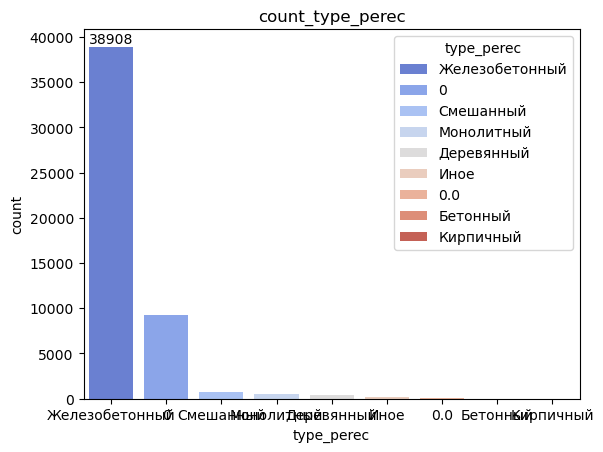

In [33]:
plt.figure()
ax = sns.barplot(x = count_type_perec.index,y = count_type_perec.values, palette='coolwarm', legend=True, hue=count_type_perec.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_type_perec')
plt.xlabel('type_perec')
plt.ylabel('count')
plt.show()

In [34]:
count_hot_water = df['hot_water'].value_counts()
count_hot_water

hot_water
0                                                                            38222
Центральное                                                                   7378
Закрытая с приготовлением горячей воды на ЦТП                                 1346
Открытая с отбором сетевой воды на горячее водоснабжение из тепловой сети     1156
Поквартирный котел                                                            1030
Квартирное (квартирный котел)                                                  263
0.0                                                                            192
Автономная котельная (крышная встроенно-пристроенная)                          184
Закрытая с приготовлением горячей воды на ИТП                                  168
Газовая колонка                                                                134
Индивидуальный тепловой пункт (ИТП)                                              1
центральное                                                                  

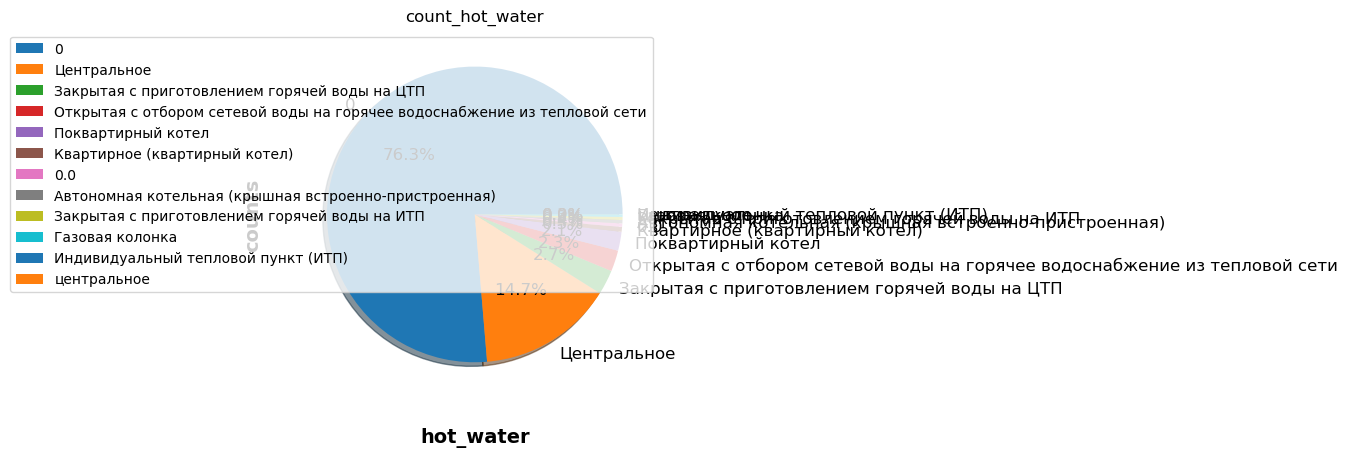

In [35]:
plt.figure()
explode = (0,0.09)
count_hot_water.plot(kind = 'pie', fontsize = 12, autopct = '%.1f%%',shadow = True)
plt.title('count_hot_water')
plt.xlabel('hot_water', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = count_hot_water.index, loc = "best")
plt.show()

In [36]:
count_remont = df['remont'].value_counts()
count_remont

remont
standard          16169
well_done         15751
design             9726
without_repair     8338
simple               91
Name: count, dtype: int64

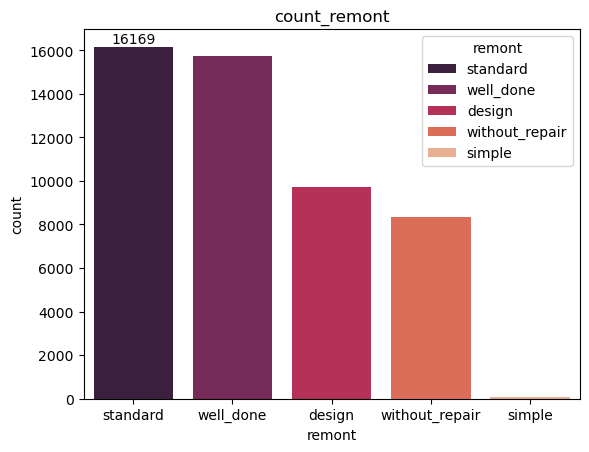

In [37]:
plt.figure()
ax = sns.barplot(x=count_remont.index,y=count_remont.values, palette='rocket', legend=True, hue=count_remont.index)
ax.bar_label(ax.containers[0], fontsize=10);
plt.title('count_remont')
plt.xlabel('remont')
plt.ylabel('count')
plt.show()

# Encoding Data :bomb:

In [38]:
le = LabelEncoder()
columns = ["city", "remont", "view", "type_perec", "hot_water", "fundament", "year"]
for column in columns:
    df[column]=le.fit_transform(df[column])

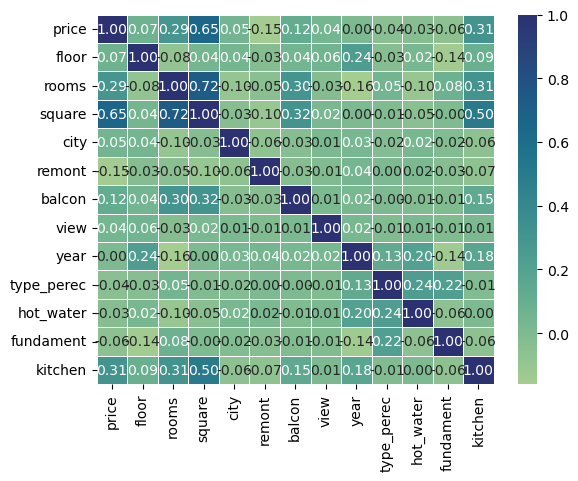

In [39]:
plt.figure()
sns.heatmap(df.corr(), cmap='crest', annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

In [ ]:
df

# :star: Features & Target :dart: 

In [ ]:
x = df.drop(columns=['price'])
y = df['price']

In [ ]:
y

In [ ]:
y=y.values.reshape(-1,1)
y

# :mag: Scaling and split :scissors:

In [ ]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2, shuffle=True, random_state=77)
joblib.dump(scaler_x, "../../scalers/alpha1_x.bin")
joblib.dump(scaler_y, "../../scalers/alpha1_y.bin")

# Teach Models :books:

In [ ]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgbm.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'CatBoost': CatBoostRegressor()
}

Name = ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting Regressor', 'ADA Boost', 'K Neighbors Regressor', 'CatBoost']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

In [ ]:
accuracy

# Save the best model :floppy_disk:

In [ ]:
# name = Name[accuracy.index(max(accuracy))]
# model = models[Name[accuracy.index(max(accuracy))]]
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
    
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = root_mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
    
# print(f"Results for {name}:")
# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)
# print("Mean Absolute Error (MAE):", mae)
# print("R-squared Score:", r2)

model.save_model("../../models/alpha1.bin")


In [ ]:
model.feature_importances_

# Test the best model :triangular_ruler:

# Import test dataset :scroll:

In [ ]:
x_plus = pd.read_csv("../../src/predict_test.csv")

In [ ]:
x_plus

In [ ]:
columns = ["city", "remont", "view", "type_perec", "hot_water", "fundament", "year"]
for column in columns:
    x_plus[column]=le.fit_transform(x_plus[column])
    
x_plus = scaler_x.fit_transform(x_plus)

In [ ]:
y_pred_plus = model.predict(x_plus)
y_pred_plus

In [ ]:
[y_pred_plus]

In [ ]:
y_pred_plus = scaler_y.inverse_transform([y_pred_plus])
ceil(y_pred_plus[0][0])